床面反射による高さ推定
実装のためのノート


In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import chirp, windows
from scipy.signal import correlate, correlation_lags
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_tukey_spectrum_amplitude
from positioning.sound_db import TukeyDB
from positioning import tools
from positioning.make_wave import chirp_exp

In [3]:
sns.set(style="whitegrid")

In [4]:
signal0 = readwav("../data/height_first/h10a0.wav")

In [5]:
signal0.shape

(917760, 2)

In [6]:
sound0 = signal0[:, 1]

<Axes: >

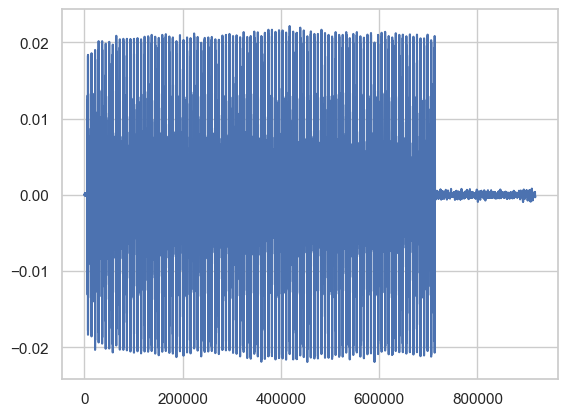

In [7]:
sns.lineplot(data=sound0)

<Axes: >

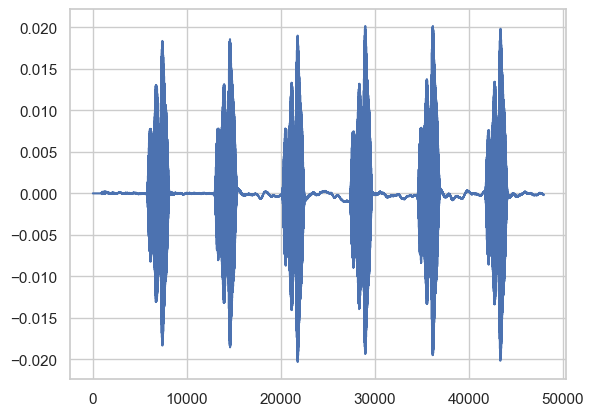

In [8]:
sns.lineplot(data=sound0[:48000])

In [9]:
ref_chirp = chirp_exp(15000, 22000, 0.05, 0.5, 48000) * windows.tukey(int(48000 * 0.05))

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

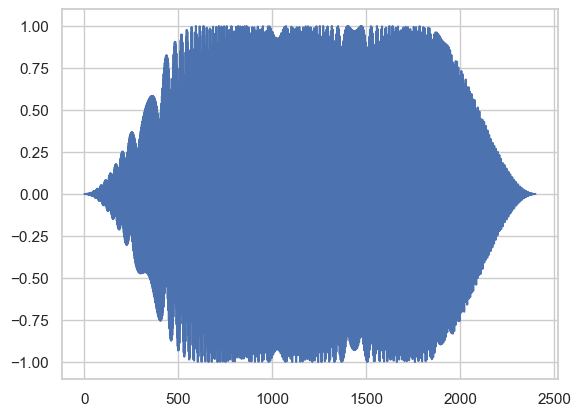

In [10]:
sns.lineplot(data=ref_chirp)

In [11]:
interval = np.zeros(int(48000 * 0.1))
ref_set = np.concatenate([ref_chirp, interval])
ref_onesec = np.tile(ref_set, 7)[:48000]

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

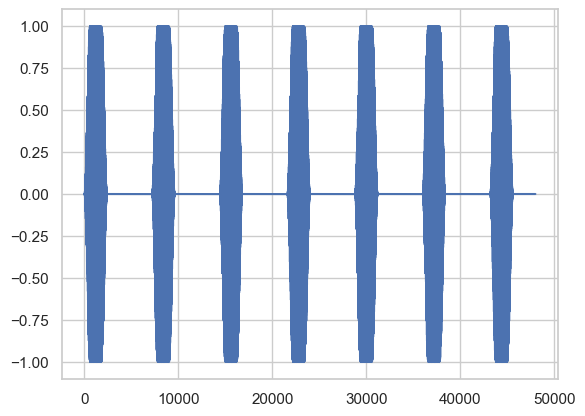

In [12]:
sns.lineplot(data=ref_onesec)

In [14]:
sound0.shape

(917760,)

In [15]:
ref_onesec.shape

(48000,)

In [19]:
theoritical_time = 2 / 340
theoritical_time

0.0058823529411764705

In [20]:
theoritical_frame = int(theoritical_time * 48000)
theoritical_frame

282

In [21]:
corr2 = correlate(sound0[48000:96000], ref_chirp)
lags2 = correlation_lags(len(sound0[:48000]), len(ref_chirp))
corr2 = corr2 / np.max(corr2)

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

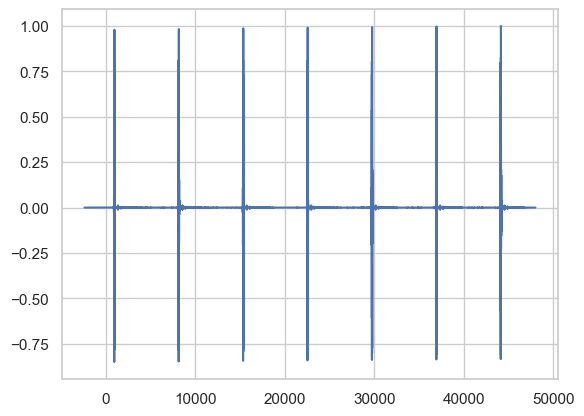

In [22]:
sns.lineplot(x=lags2, y=corr2)

In [23]:
max_i = np.argmax(corr2)
max_i

46547

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

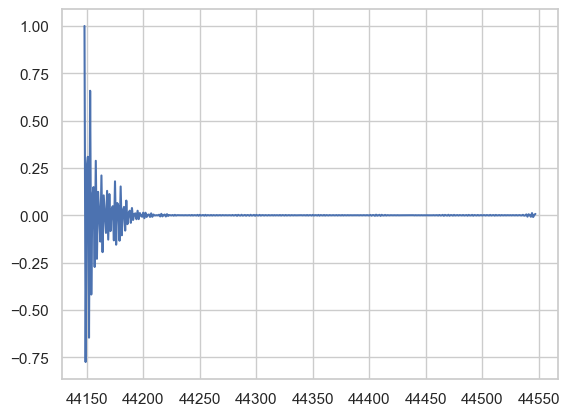

In [24]:
sns.lineplot(x=lags2[max_i : max_i + 400], y=corr2[max_i : max_i + 400])

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

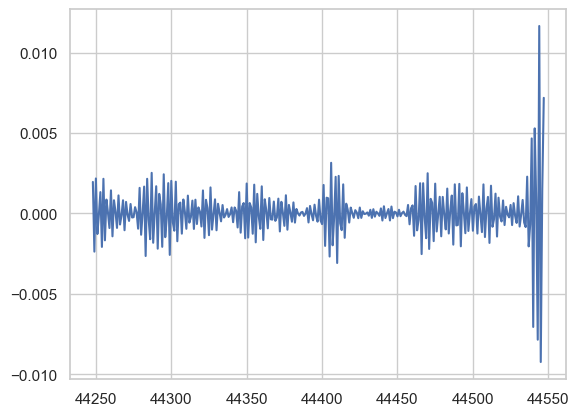

In [25]:
sns.lineplot(x=lags2[max_i + 100 : max_i + 400], y=corr2[max_i + 100 : max_i + 400])

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

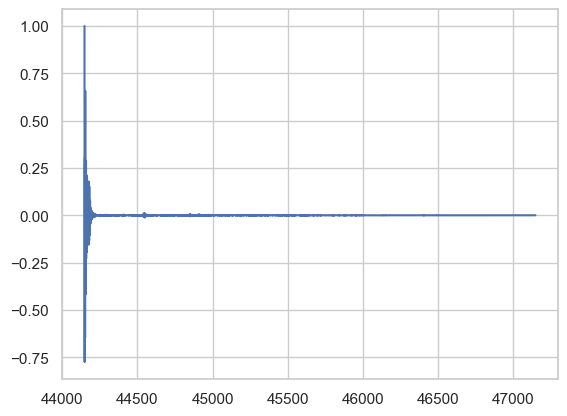

In [26]:
sns.lineplot(x=lags2[max_i : max_i + 3000], y=corr2[max_i : max_i + 3000])

In [27]:
%matplotlib inline

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/pandas/core/dtypes/astype.py:134: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


<Axes: >

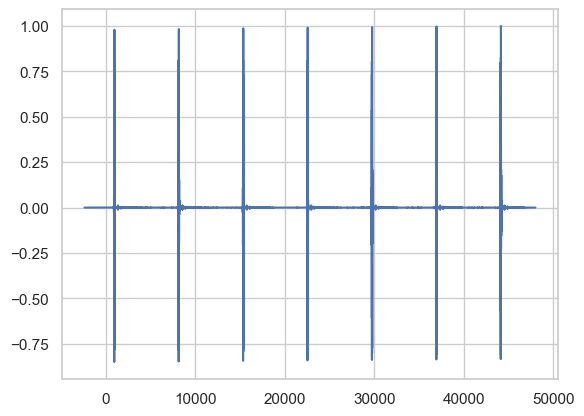

In [28]:
sns.lineplot(x=lags2, y=corr2)

In [29]:
ref_set.shape

(7200,)

In [30]:
first_max_i = np.argmax(corr2[:10000])
first_max_i

3347

In [31]:
max_i_array = np.array([first_max_i])
corr2_oneset = np.array([corr2[first_max_i - 100 : first_max_i + 3500]])
for i in range(1, 5):
    max_i_k = (
        np.argmax(
            corr2[first_max_i + (7200 * i) - 3600 : first_max_i + (7200 * i) + 3600]
        )
        + first_max_i
        + (7200 * i)
        - 3600
    )
    max_i_array = np.append(max_i_array, max_i_k)
    corr2_oneset = np.concatenate(
        [corr2_oneset, [corr2[max_i_k - 100 : max_i_k + 3500]]]
    )
max_i_array

array([ 3347, 10547, 17747, 24947, 32147])

In [32]:
corr2_oneset.shape

(5, 3600)

In [33]:
corr2_avg = np.mean(corr2_oneset, axis=0)
corr2_avg.shape

(3600,)

/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ange0/lab-audio/my-lab/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


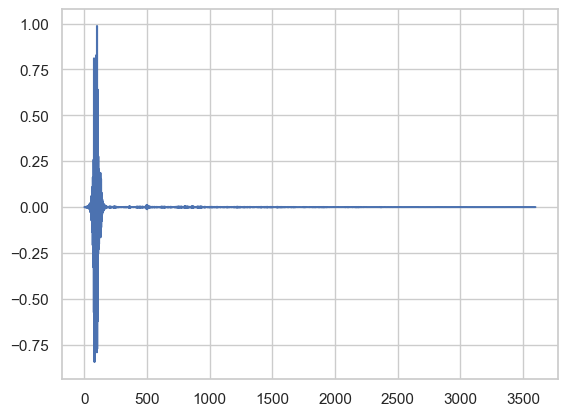

In [34]:
plt.plot(corr2_avg)

In [35]:
%matplotlib qt6

In [36]:
plt.plot(corr2_avg)

In [37]:
corr2_avg_max_i = np.argmax(corr2_avg)
corr2_avg_second_i = (
    np.argmax(corr2_avg[corr2_avg_max_i + 100 :]) + corr2_avg_max_i + 100
)
print(corr2_avg_max_i, corr2_avg_second_i)

100 496


In [38]:
estimated_height = (corr2_avg_second_i - corr2_avg_max_i) / 48000 * 340 / 2
print(estimated_height)

1.4025


どうやら天井との距離の様子  
スマホのスピーカーが画面側についているから？


In [39]:
def get_height(sound0, ref_chirp):
    corr2 = correlate(sound0[48000:96000], ref_chirp)
    lags2 = correlation_lags(len(sound0[:48000]), len(ref_chirp))
    corr2 = corr2 / np.max(corr2)
    first_max_i = np.argmax(corr2[:10000])
    max_i_array = np.array([first_max_i])
    corr2_oneset = np.array([corr2[first_max_i - 100 : first_max_i + 3500]])
    for i in range(1, 5):
        max_i_k = (
            np.argmax(
                corr2[first_max_i + (7200 * i) - 3600 : first_max_i + (7200 * i) + 3600]
            )
            + first_max_i
            + (7200 * i)
            - 3600
        )
        max_i_array = np.append(max_i_array, max_i_k)
        corr2_oneset = np.concatenate(
            [corr2_oneset, [corr2[max_i_k - 100 : max_i_k + 3500]]]
        )
    corr2_avg = np.mean(corr2_oneset, axis=0)
    corr2_avg_max_i = np.argmax(corr2_avg)
    corr2_avg_second_i = (
        np.argmax(corr2_avg[corr2_avg_max_i + 100 :]) + corr2_avg_max_i + 100
    )
    estimated_height = (corr2_avg_second_i - corr2_avg_max_i) / 48000 * 340 / 2
    return estimated_height

In [40]:
heights = []
for i in range(11, 15):
    signal = readwav(f"../data/height_first/h{i}.wav")
    sound = signal[:, 1]
    heights.append(get_height(sound, ref_chirp))
print(heights)

[1.3458333333333334, 1.29625, 1.2077083333333334, 1.1156249999999999]


In [41]:
heights = np.array(heights)
ceiling_height = 2.5
print(ceiling_height - heights)

[1.15416667 1.20375    1.29229167 1.384375  ]


In [42]:
angle_heights = []
for i in range(0, 60, 15):
    signal = readwav(f"../data/height_first/h10a{i}.wav")
    sound = signal[:, 1]
    angle_heights.append(get_height(sound, ref_chirp))
print(angle_heights)

[1.4025, 1.4166666666666667, 1.42375, 1.413125]


In [43]:
test_heights = []
for i in range(9):
    signal = readwav(f"../data/pos_3d_first/test{i}h.wav")
    sound = signal[:, 1]
    test_heights.append(get_height(sound, ref_chirp))
print(test_heights)

[1.391875, 1.4025, 2.2772916666666667, 1.3989583333333333, 1.4166666666666667, 1.4095833333333332, 1.2289583333333334, 1.2183333333333333, 1.29625]
